Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You
may want to tune the hyperparameters using small validation sets to speed up the
process. What accuracy can you reach?

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array(mnist.data)
y = np.array(mnist.target).astype(int)

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a svc pipeline so that it will standardize the X values
svc = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(gamma = "auto",random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [4]:
# fit the training data in our multiclass SVC
svc.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(gamma='auto', random_state=42))])

In [5]:
y_pred = svc.predict(X_test)

print("Accuracy score of our SVC is: ", accuracy_score(y_pred,y_test))

Accuracy score of our SVC is:  0.9645714285714285


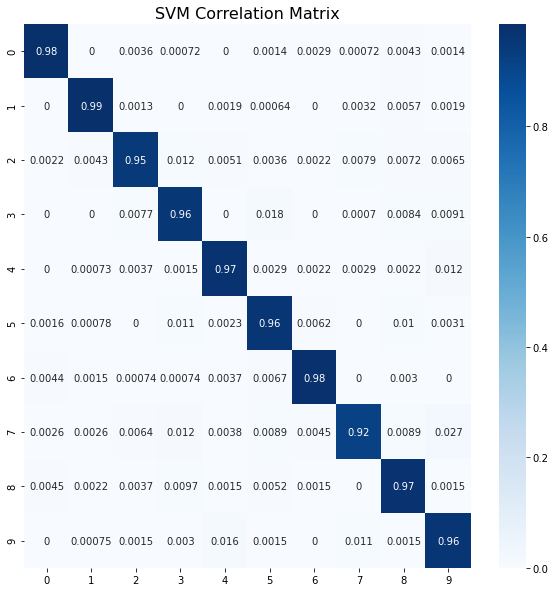

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
svc_cm = confusion_matrix(y_pred,y_test, normalize = "true")

plt.figure(figsize=(10,10))
plt.title('SVM Correlation Matrix', fontsize=16);
sns.heatmap(svc_cm, annot=True, cmap = 'Blues',)

Oh wow, this is actually a really good model! But this is MNIST after all and the data is perfect and super clean...